In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsRegressor

Set the various parameters of this example.

In [2]:
# a)
np.random.seed(42)

mu = 0.0
sigma = 1.15
N= 51
N_T = 100
kMax = 20
f_exact = lambda x : x * x

x_0 = 0.5
k_fixed = 3

Initialize some variables.

In [3]:
X_train = dict()
y_train = dict()
f_exact_train = dict()
epsilon_train = dict()

errors = np.zeros(kMax)
noise_pred_errors = np.zeros(kMax)
biasSqs = np.zeros(kMax)
biasSqs_noise_pred = np.zeros(kMax)
noises = np.zeros(kMax)
variances = np.zeros(kMax)
noise_pred_variances = np.zeros(kMax)
noise_variances = np.zeros(kMax)

Compute the $N_T$ different training sets.

In [4]:
for t in range(N_T):
    X_train[t] = (np.random.rand(N, 1) * 8.0) - 4.0
    y_train[t] = np.zeros(N)
    y_train[t] = y_train[t].reshape(-1, 1)
    epsilon_train[t] = np.random.normal(mu, sigma, N)
    epsilon_train[t] = epsilon_train[t].reshape(-1, 1)
    y_train[t] = f_exact(X_train[t]) + epsilon_train[t]
    f_exact_train[t] = f_exact(X_train[t])

Evaluate irreducible error, bias, variance and total error.

In [5]:
neigh = dict()

for k in range(1,kMax+1):

    exact_predictions = np.zeros(N_T)
    noise_predictions = np.zeros(N_T)

    for t in range(N_T):
        neigh[t] = KNeighborsRegressor(n_neighbors=k)
        neigh[t].fit(X_train[t], f_exact_train[t])
        exact_predictions[t] = neigh[t].predict([[x_0]])
        
        neigh[t].fit(X_train[t], y_train[t])
        noise_predictions[t] = neigh[t].predict([[x_0]])
        
    # Expected value and bias of exact predictions
    E_T_exact_prediction = np.sum(exact_predictions) / N_T
    bias = E_T_exact_prediction - f_exact(x_0)
    
    # Expected value and noise of noise predictions
    E_T_noise_predictions = np.sum(noise_predictions) / N_T
    bias_noise_pred = E_T_noise_predictions - f_exact(x_0)

    noise_variance = sigma * sigma / k
    
    # Variance of exact predictions
    Var_T_exact_prediction = np.sum((exact_predictions - E_T_exact_prediction) ** 2) / (N_T - 1)
    variance = Var_T_exact_prediction + noise_variance
    
    # Variance of noise predictions
    Var_T_noise_prediction = np.sum((noise_predictions - E_T_noise_predictions) ** 2) / (N_T - 1)
    noise_pred_variance = Var_T_noise_prediction + noise_variance
    
    error = sigma*sigma + bias * bias + variance
    noise_pred_error = sigma * sigma + bias_noise_pred * bias_noise_pred + noise_pred_variance

    errors[k-1] = error
    noise_pred_errors[k-1] = noise_pred_error
    biasSqs[k-1] = bias * bias
    biasSqs_noise_pred[k-1] = bias_noise_pred * bias_noise_pred
    variances[k-1] = variance
    noise_pred_variances[k-1] = noise_pred_variance
    noises[k-1] = sigma * sigma
#    noise_variances[k-1]=noise_variance

Plot the results.

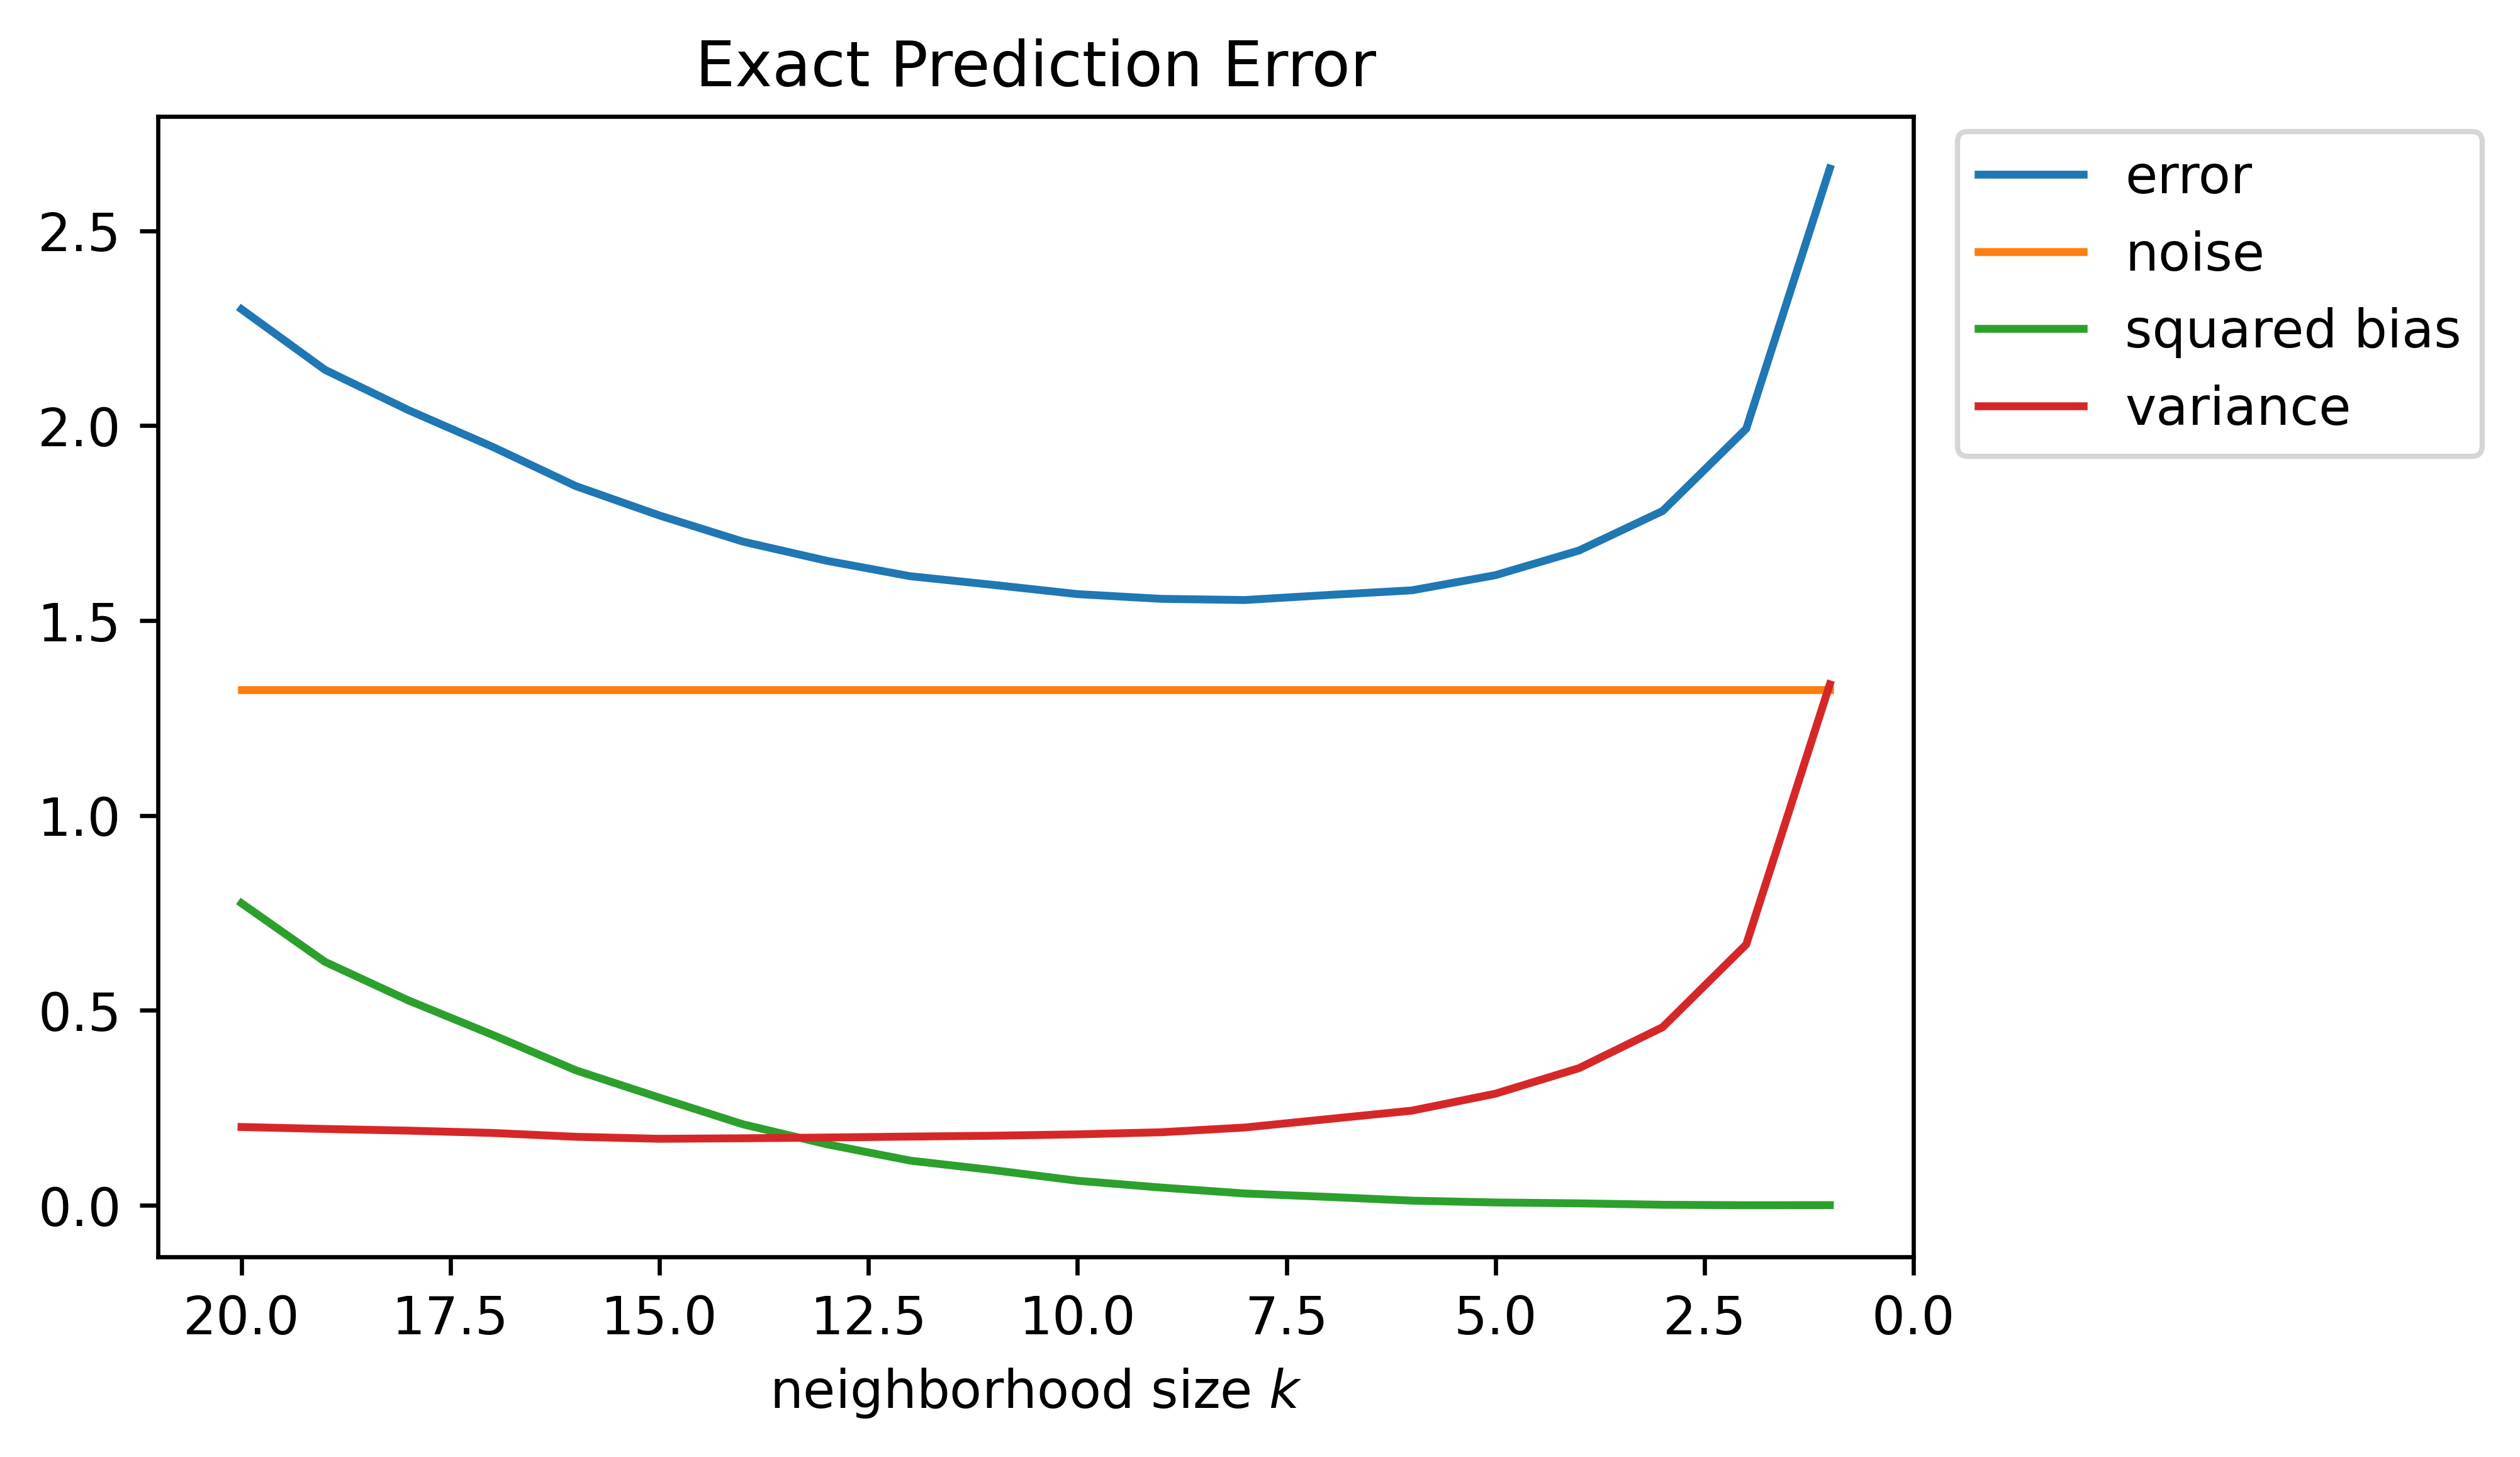

In [6]:
plt.figure(dpi=600)
plt.xlim(21, 0)
plt.title('Exact Prediction Error')
plt.plot(np.linspace(1, kMax, kMax), errors, label='error')
plt.plot(np.linspace(1, kMax, kMax), noises, label='noise')
plt.plot(np.linspace(1, kMax, kMax), biasSqs, label='squared bias')
plt.plot(np.linspace(1, kMax, kMax), variances, label='variance')
#plt.plot(np.linspace(1, kMax, kMax), noise_variances, label='noise variance')
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left')
plt.xlabel('neighborhood size $k$')
plt.show()

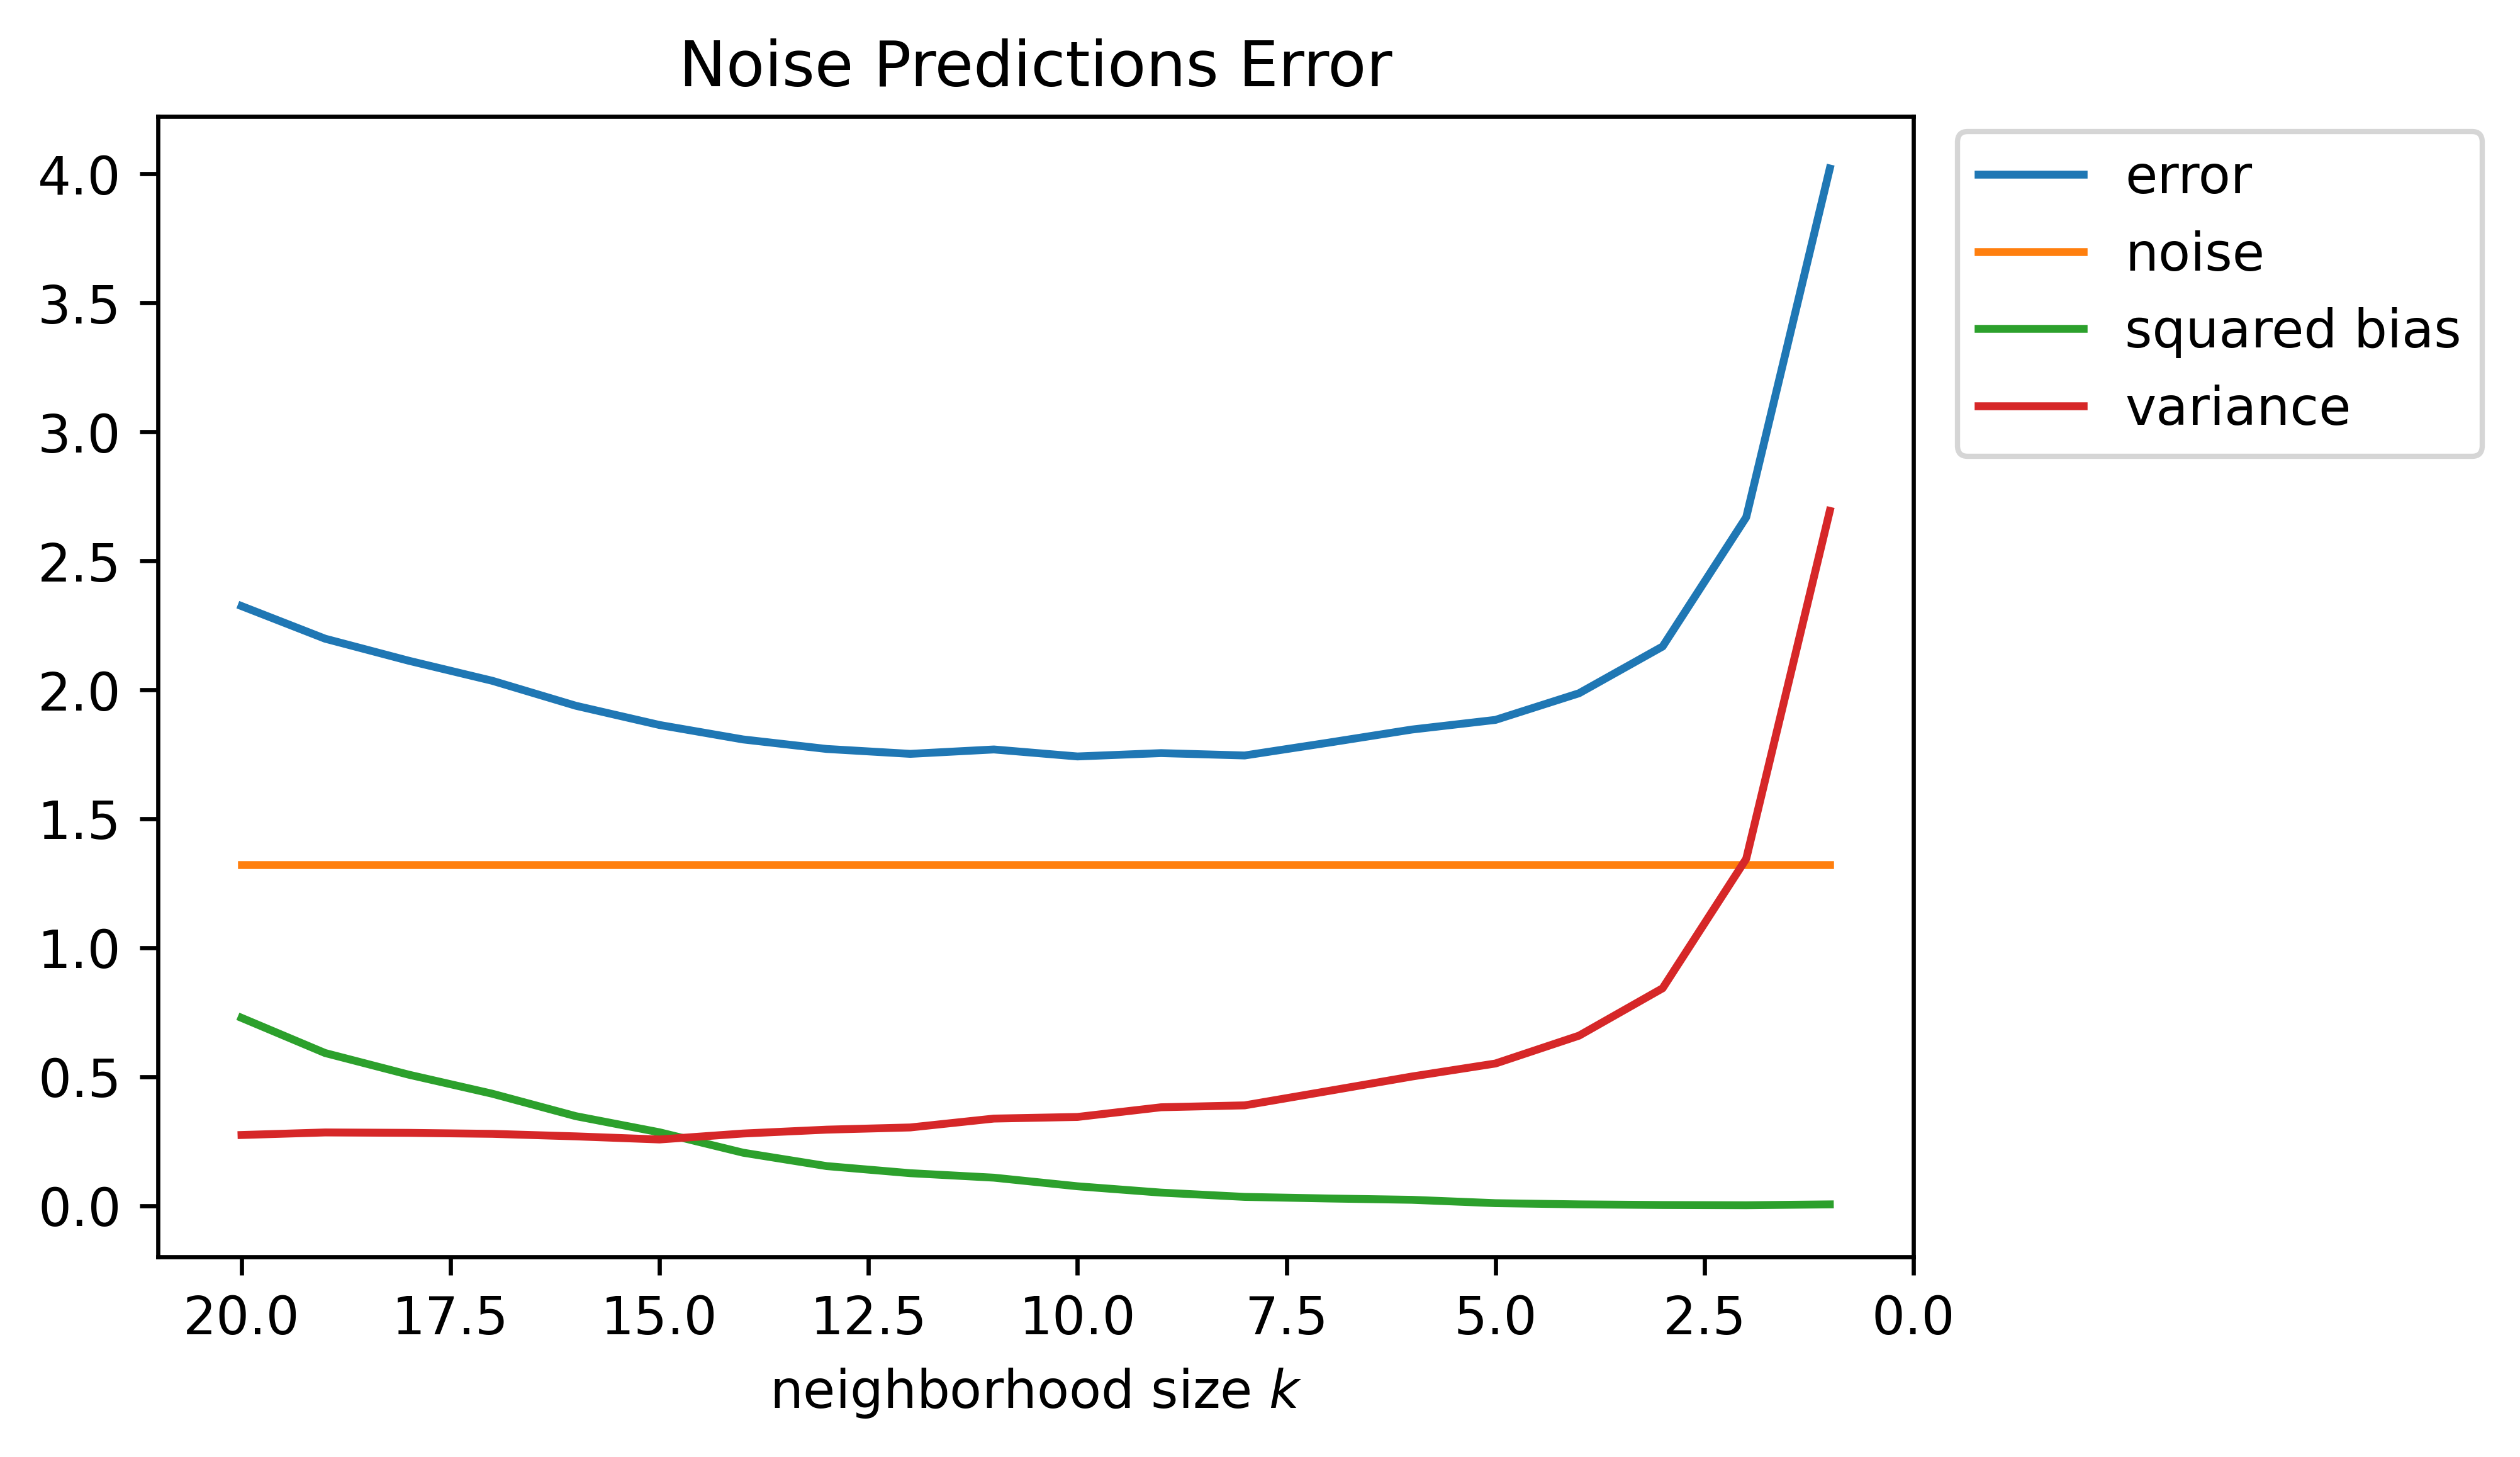

In [7]:
plt.figure(dpi=600)
plt.xlim(21, 0)
plt.title('Noise Predictions Error')
plt.plot(np.linspace(1, kMax, kMax), noise_pred_errors, label='error')
plt.plot(np.linspace(1, kMax, kMax), noises, label='noise')
plt.plot(np.linspace(1, kMax, kMax), biasSqs_noise_pred, label='squared bias')
plt.plot(np.linspace(1, kMax, kMax), noise_pred_variances, label='variance')
#plt.plot(np.linspace(1, kMax, kMax), noise_variances, label='noise variance')
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left')
plt.xlabel('neighborhood size $k$')
plt.show()

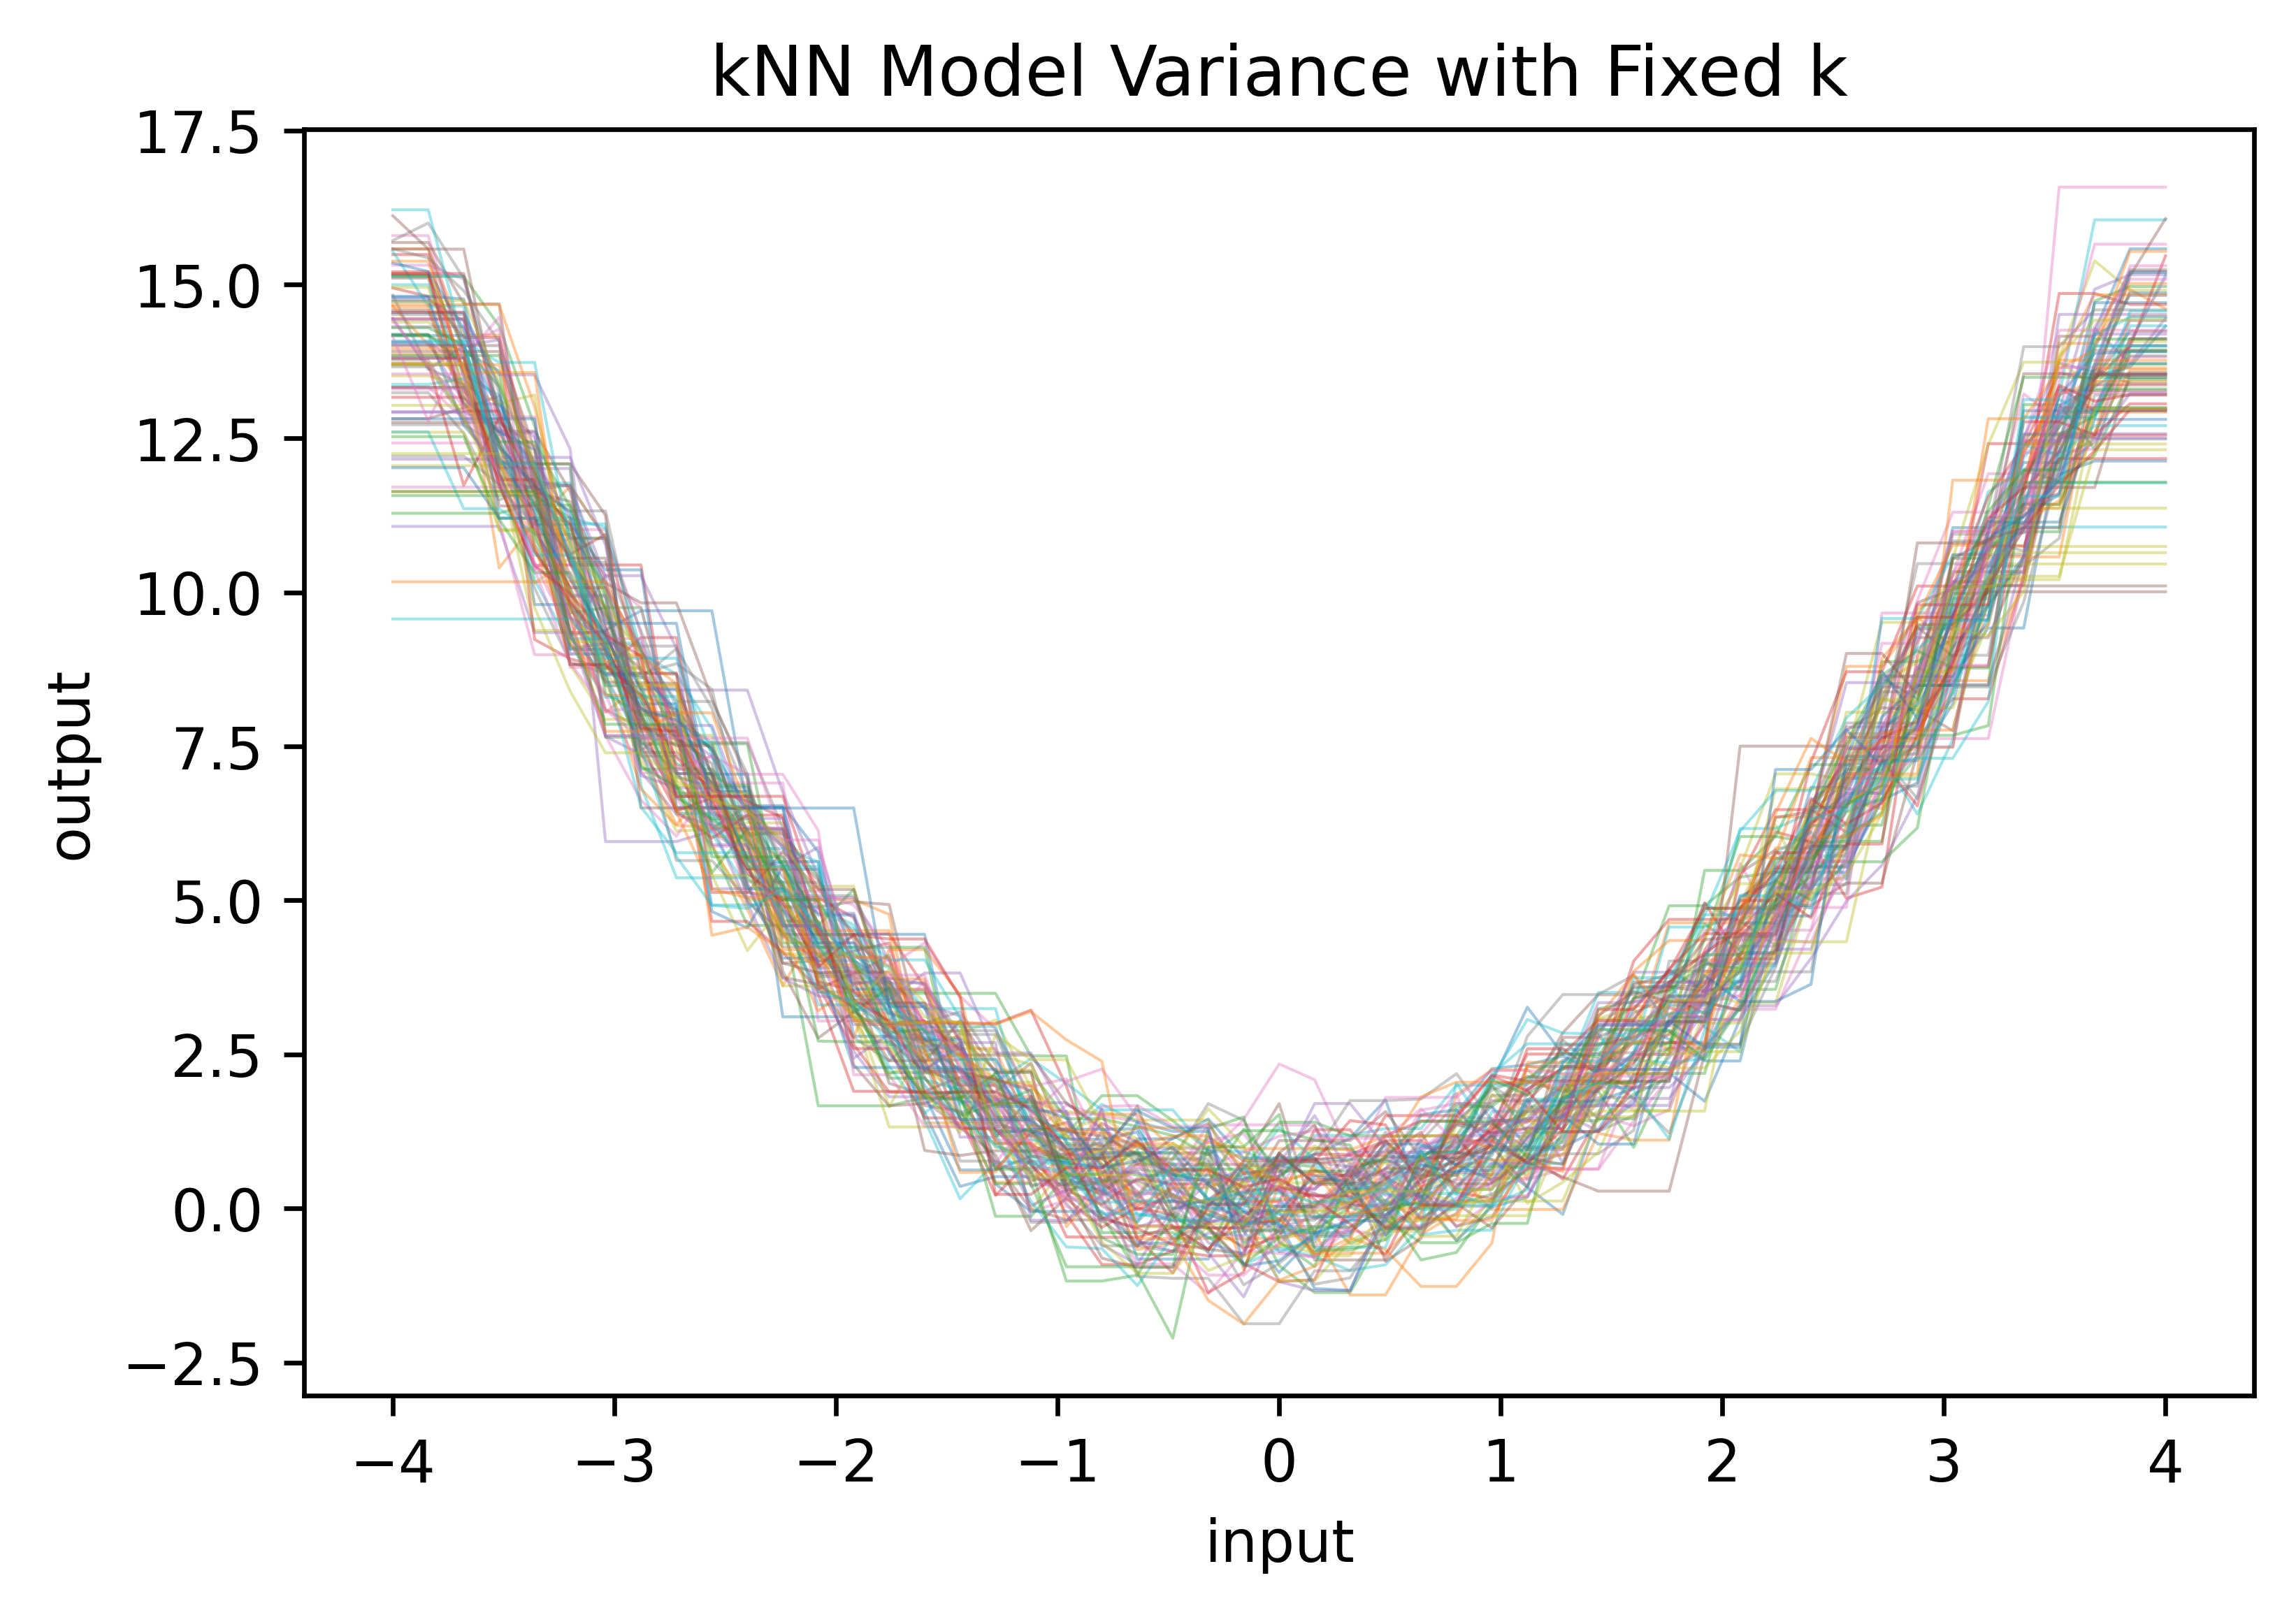

In [8]:
# b)
plt.figure(dpi=600)

for i in range(N_T):
    neigh = KNeighborsRegressor(n_neighbors=k_fixed)
    neigh.fit(X_train[i], y_train[i])
    
    plt.plot(np.linspace(-4, 4, N), neigh.predict(np.linspace(-4, 4, N).reshape(-1, 1)), alpha=0.4, linewidth=0.5)

plt.title('kNN Model Variance with Fixed k')
plt.xlabel('input')
plt.ylabel('output')
plt.savefig('knn_model_variance_fixed_k.png', dpi=500)
plt.show()